# GRIP: The Sparks Foundation

# Data Science and Bisness Analytics Intern

# Author-Dipankar Santra

#  Task -1:Prediction using Supervised ML

# steps

Steps1-Importing the dataset.
Steps2-visualizing dataset.
Steps3-Data prepration.
Steps4-Train the algorithum.
Steps5-visualizing the model.
Steps6-Making prediction.
Steps7-Evaluction the model.

# Steps1-Importing the dataset.

In [1]:
import pandas as pd
import imblearn as imb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/w-data"

In [3]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [65]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [67]:
df.shape

(25, 2)

In [68]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [69]:
df.isnull().sum() 

Hours     0
Scores    0
dtype: int64

# Steps2-visualizing dataset.

In this data set we have to chake the relaction between two data

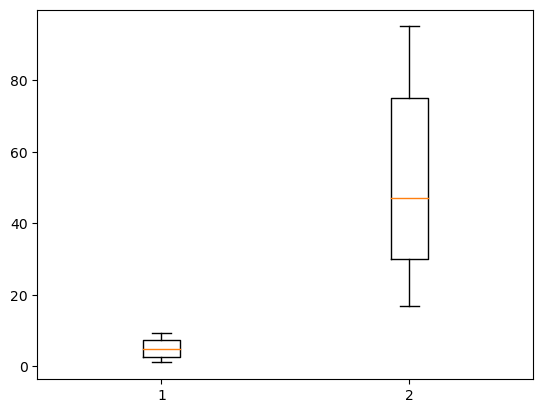

In [70]:
#fig = plt.figure(figsize =(10, 7))
data1=df["Hours"]
data2=df["Scores"]

data=[data1,data2]
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

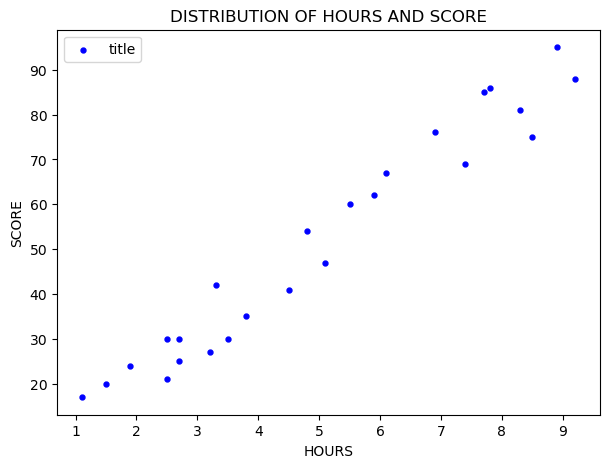

In [71]:
plt.figure(figsize = (7,5))

plt.title("DISTRIBUTION OF HOURS AND SCORE")
plt.xlabel("HOURS")
plt.ylabel("SCORE")

#plt.plot(x,y)
plt.scatter(df.Hours, df.Scores, color = "BLUE", s =50, marker = ".", alpha =1, label = "title" ) # s= size of dots.marker= designed the shape of image. 

plt.legend() #shown ABC

plt.show()

In [72]:
df.corr(method='kendall')

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


In [73]:
df.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


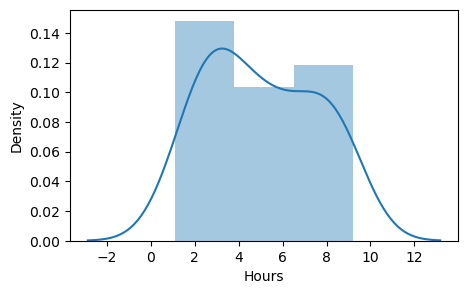

In [74]:
#distribution plot
plt.figure(figsize = (5,3))
sns.distplot(df.Hours)
import warnings
warnings.filterwarnings('ignore')

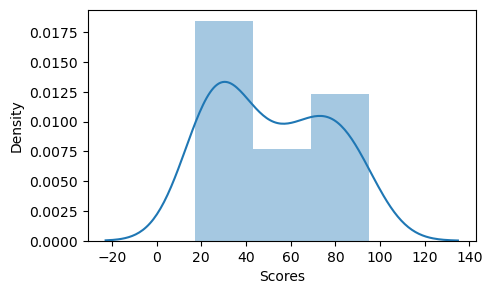

In [75]:
plt.figure(figsize = (5,3))
sns.distplot(df.Scores)
import warnings
warnings.filterwarnings('ignore')

# Steps3-Data prepration.

# linear regression

In [76]:
# import model related libraries
from sklearn.linear_model import LinearRegression  # input function is present we can call it.


# preprocessing libraries
from sklearn.model_selection import train_test_split    # this methode the number is divived in two type one is
                                                        #     80% and 20% explane previously.

# import module to calculate model perfomance metrics # Average Error, Root Mean Square Error, MAPE, MAE, Accuracy, precision, recall
from sklearn import metrics # help you to evaluate the performance of your models

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Step 2: select independent(X) and dependent variable (y)
# create a Python list of feature names
input_feature_names = ['Hours']

# use the list to select a subset of the original DataFrame
X = df[input_feature_names] # assigned to x

# sales
y = df['Scores'] # assigned to Y

# Steps4-Training algorithum.

we have to split our data train and testing set, now we are train our model

In [79]:
# Step 3: Splitting X and y into training and testing sets # train_size = 0.7, test_size =0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42, # makes sure, the splits are not random, repeatable
                                                    train_size=0.70,
                                                    shuffle = True) # Time Series Data

In [80]:
# Linear Regression Model
linreg = LinearRegression() # creates an instance of the LinearRegression model,inititlaising an object  (linreg) of the Linear Regression Class
# Y = aX + b

# The fit() method learns the relationship between the input variables and the
#output variable in the training data and updates the internal state of the LinearRegression object.
linreg.fit(X_train, y_train) # fit into the linear model


LinearRegression()

# Steps5-visualizing the model

In [81]:
linreg.coef_ # y=mX+c

array([9.71054094])

In [82]:
linreg.intercept_

2.794196676599803

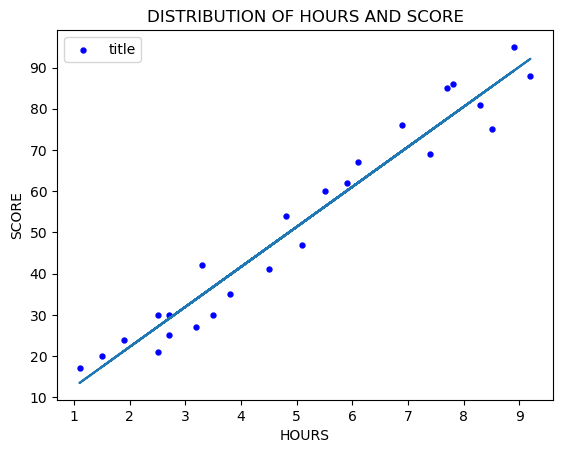

In [83]:
#plt.figure(figsize = (7,5))
m=linreg.coef_
c=linreg.intercept_
Y=m*X+c
plt.plot(X,Y)
plt.scatter(X,y, color = "BLUE", s =50, marker = ".", alpha =1, label = "title" ) # s= size of dots.marker= designed the shape of image. 
plt.title("DISTRIBUTION OF HOURS AND SCORE")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.legend() #shown ABC

plt.show()

# Steps6-Making prediction.

In [85]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


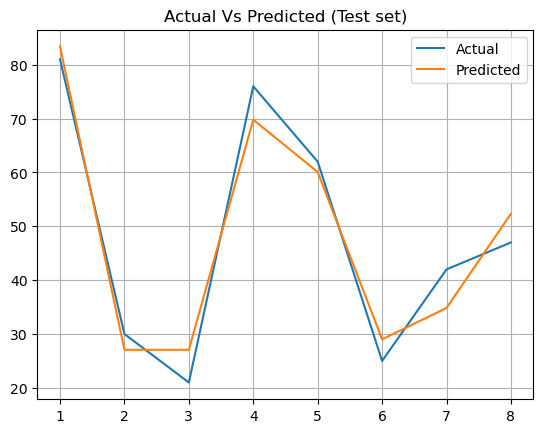

In [86]:
%matplotlib inline
x=np.arange(1,len(y_test)+1)

plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)

# Steps6-Making prediction.

Whate will be predicting score if a students studies for 9.5 hours/day?

In [88]:
h=9.5
own_pred=linreg.predict([[h]])
print ("The predicting score a students studies for 9.5 hours/day is",own_pred[0])


The predicting score a students studies for 9.5 hours/day is 95.04433557250368


# Steps7-Evaluction the model.

In [89]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # RMSE 

4.859985351228103

In [90]:
print("Rsquare=",metrics.r2_score(y_test,y_pred))

Rsquare= 0.9487647340257012
